<a href="https://colab.research.google.com/github/KartonDCP/MathWorks/blob/master/Copy_of_Task7part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras as keras
from tensorflow.keras import regularizers

# Вариант 6
## С помощью аппроксимирующей НС найти корень уравнения $ 0.5^{x^2} * 2^{2x+2} = 64^{-1} $ с абсолютной погрешностью не более $10^{-3}$




In [ ]:
x = np.arange(-3, 5, 0.0001)
func = lambda x: (0.5**(x**2)) * (2**(2*x+2))
y = func(x)
y_val = 1.0/64

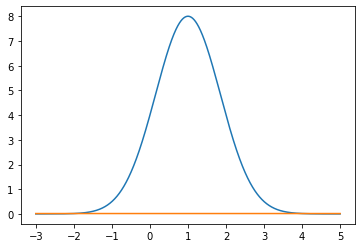

In [ ]:
plt.plot(x, y)
plt.plot(x, np.ones(x.shape) * y_val);

# Отсюда видно, что корень находится в промежутке [-2.1 -1.9] и второй в [3.8 4.1]

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(10, input_dim=1, activation='sigmoid', kernel_initializer='he_uniform'))
model.add(keras.layers.Dense(10, activation='sigmoid', kernel_initializer='he_uniform'))
model.add(keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')

In [ ]:
train_x = np.arange(-2.1, -1.9, 0.0001)
train_y = func(train_x)
print(train_x)
print(train_y)

[-2.1    -2.0999 -2.0998 ... -1.9002 -1.9001 -1.9   ]
[0.01023745 0.01024185 0.01024625 ... 0.02350058 0.02351003 0.02351948]


In [ ]:
model.fit(train_y, train_x, epochs=50);

Epoch 1/50
63/63 [==============================] - 0s 2ms/step - loss: 5.3622
Epoch 2/50
63/63 [==============================] - 0s 1ms/step - loss: 3.1631
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 1.7579
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 0.8916
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 0.4031
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 0.1608
Epoch 7/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0571
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0193
Epoch 9/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 10/50
63/63 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 11/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 12/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 13/50
63/63 [==============================

In [ ]:
result = model.predict([1.0/64])
print(result)

[[-2.0013046]]


# Получили реальное решение с точностью выше $10^{-3}$
# Один из корней уравнения - 2
# Напишем функцию которая дает численное решение уравнения на интервале

In [ ]:
def solve(inverval_left, interval_right):
  model = keras.Sequential()
  model.add(keras.layers.Dense(10, input_dim=1, activation='sigmoid', kernel_initializer='he_uniform'))
  model.add(keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform'))
  model.add(keras.layers.Dense(1))
  model.compile(loss='mse', optimizer='adam')
  left_value = [1.0/64]
  train_x = np.arange(inverval_left, interval_right, 0.00005)
  train_y = func(train_x)
  model.fit(train_y, train_x, epochs=50, verbose=0);
  result = model.predict(left_value)[0][0]
  return result

In [ ]:
solve(-2.1, -1.9) # Реальный корень -2

-2.0002413

In [ ]:
solve(3.9, 4.1) # Реальный корень 4

4.0044923